In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import tensorflow.lite as tflite


# loading the model

In [201]:
model = keras.models.load_model('dino_dragon_10_0.899.h5')

In [202]:
classes={0:"dino",1:"dragon"}

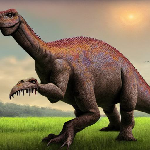

In [203]:
path = '../deep_learning/dino-dragon/test/dino'
name = '9c933c4a-d6e1-4a6b-b0ea-2628c4062cda.jpg'
fullname = f'{path}/{name}'
img=load_img(fullname,target_size=(150, 150))
img

In [204]:
x = np.array(img)
X = np.array([x])

X =X/255

In [205]:
model.predict(X)

array([[0.00637367]], dtype=float32)

In [206]:
y_pred=model.predict_classes(X)
classes[int(y_pred)]

'dino'

# Convert Keras to TF-Lite


In [182]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('dino_dragon_10_0.899.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Anas\AppData\Local\Temp\tmpapwldwu5\assets


INFO:tensorflow:Assets written to: C:\Users\Anas\AppData\Local\Temp\tmpapwldwu5\assets


In [224]:
import os
os.path.getsize('dino_dragon_10_0.899.tflite')

44865808

# Use the tflite model

In [207]:
interpreter = tflite.Interpreter(model_path='dino_dragon_10_0.899.tflite')
interpreter.allocate_tensors()

In [208]:
interpreter.get_input_details()

[{'name': 'conv2d_input',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [209]:
input_index=interpreter.get_input_details()[0]["index"]
output_index=interpreter.get_output_details()[0]["index"]

In [210]:
X=np.array(X,dtype=np.float32)
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [211]:
preds

array([[0.00637367]], dtype=float32)

# Downloading and preparing an image

In [212]:
from download_prepare_img import *

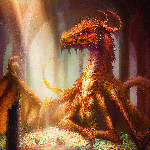

In [213]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Smaug_par_David_Demaret.jpg/1280px-Smaug_par_David_Demaret.jpg'
img=download_image(url)
img=prepare_image(img,(150,150))
img

In [214]:
X=np.array(img)
X=X/255

In [215]:
X.shape

(150, 150, 3)

In [216]:
X[0,0,0]

0.5529411764705883

In [217]:
X=np.expand_dims(X, axis=0)

In [218]:
X.shape

(1, 150, 150, 3)

# Apply the model to the image downloaded

In [219]:
model.predict(X)

array([[0.82448584]], dtype=float32)

In [220]:
y_pred=model.predict_classes(X)
classes[int(y_pred)]

'dragon'

## predict with the tflite model 

In [223]:
X=np.array(X,dtype=np.float32)
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
preds

array([[0.8244865]], dtype=float32)